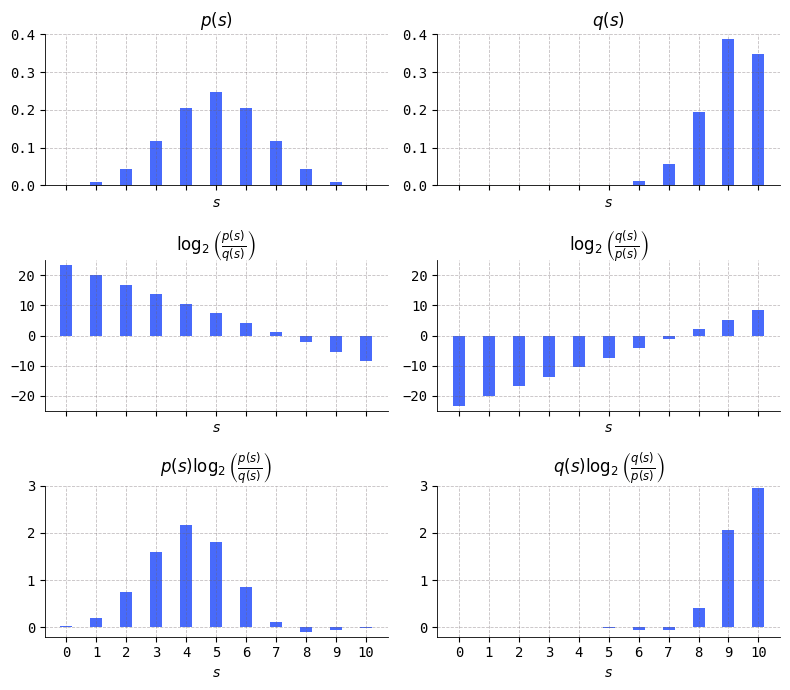

In [26]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy as sp
import math
import seaborn as sns
#import matplotlib_inline.backend_inline
import warnings
plt.style.use('./aux-files/custom_style_light.mplstyle')
#matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
warnings.filterwarnings('ignore')
blue = '#486AFB'
magenta = '#FD46FC'

grid = np.arange(0, 11)
p = sp.stats.binom(n=10, p=0.5).pmf(grid)
q = sp.stats.binom(n=10, p=0.9).pmf(grid)
titles = ['$p(s)$',
          '$q(s)$',
          '$\\log_2\\left(\\frac{p(s)}{q(s)}\\right)$',
          '$\\log_2\\left(\\frac{q(s)}{p(s)}\\right)$',
          '$p(s)\\log_2\\left(\\frac{p(s)}{q(s)}\\right)$',
          '$q(s)\\log_2\\left(\\frac{q(s)}{p(s)}\\right)$']
probs = [p,
         q,
         np.log2(p / q),
         np.log2(q / p),
         p * np.log2(p / q),
         q * np.log2(q / p)]
ylims = [(0, 0.4),
         (0, 0.4),
         (-25, 25),
         (-25, 25),
         (-0.2, 3),
         (-0.2, 3)]

fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(8, 7), sharex=True)

for title, prob, ylim, axis in zip(titles, probs, ylims, axes.flatten()):
    axis.bar(grid, prob, width=0.4)
    axis.set_xticks(ticks=grid)
    axis.set_ylim(ylim)
    axis.set_title(title)
    axis.set_xlabel('$s$')

plt.tight_layout()

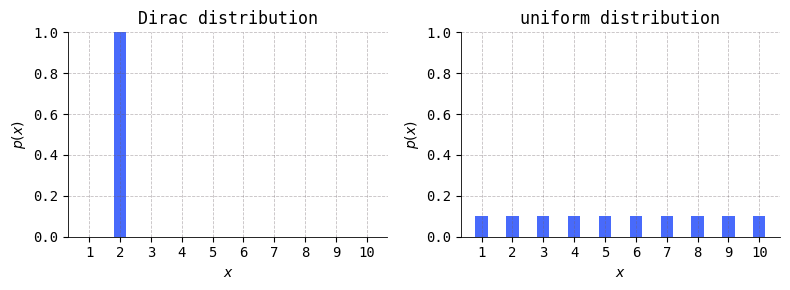

In [15]:
grid = range(1, 11)
spike = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
uniform = [0.1] * 10

_, axes = plt.subplots(ncols=2, figsize=(8, 3), sharex=True)

axes[0].bar(grid, spike, width=0.4)
axes[0].set_xlabel('$x$')
axes[0].set_ylabel('$p(x)$')
axes[0].set_xticks(range(1, 11))
axes[0].set_ylim(0, 1)
axes[0].set_title('Dirac distribution')
axes[1].bar(grid, uniform, width=0.4)
axes[1].set_xlabel('$x$')
axes[1].set_ylabel('$p(x)$')
axes[1].set_ylim(0, 1)
axes[1].set_title('uniform distribution')
plt.tight_layout()

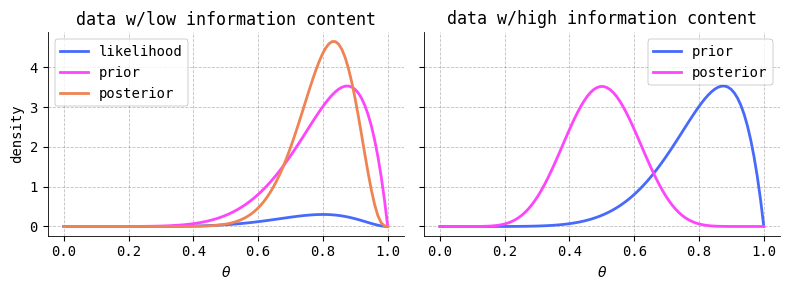

In [16]:
alpha = 8
beta = 2
n = 10
x = 8
x_low = 8
x_high = 2
prior = sp.stats.beta(a=alpha, b=beta)
posterior_low = sp.stats.beta(a=x_low + alpha, b=n - x_low + beta)
posterior_high = sp.stats.beta(a=x_high + alpha, b=n - x_high + beta)

def likelihood(x, n, theta):
    return math.comb(n, x) * (theta ** x) * (1 - theta) ** (n - x)

grid = np.linspace(0, 1, 100)
_, axes = plt.subplots(ncols=2, figsize=(8, 3), sharey=True)

axes[0].plot(grid, likelihood(x, n, grid), label='likelihood')
axes[0].plot(grid, prior.pdf(grid), label='prior')
axes[0].plot(grid, posterior_low.pdf(grid), label='posterior')
axes[0].set_xlabel('$\\theta$')
axes[0].set_ylabel('density')
axes[0].set_title('data w/low information content')
axes[0].legend()
axes[1].plot(grid, prior.pdf(grid), label='prior')
axes[1].plot(grid, posterior_high.pdf(grid), label='posterior')
axes[1].set_xlabel('$\\theta$')
axes[1].set_title('data w/high information content')
axes[1].legend()

plt.tight_layout()

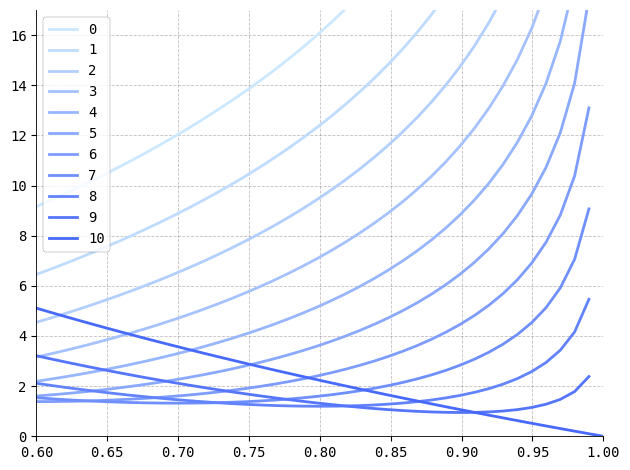

In [17]:
blues = sns.color_palette('blend:#cce8ff,#486afb', n_colors=11)

n = 10
x_list = list(range(0, 11))

for x in x_list:
    plt.plot(grid, -np.log(likelihood(x, n, grid)), color=blues.as_hex()[x], label=f'{x}')

plt.xlim(0.6, 1)
plt.ylim(0, 17)
plt.legend()
plt.tight_layout()

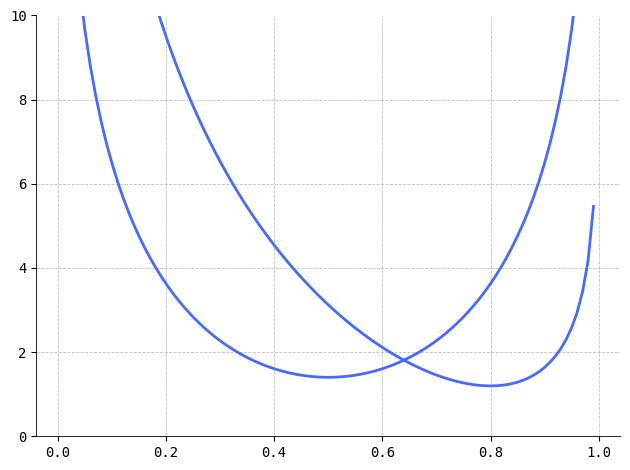

In [18]:
x = 8
n = 10
plt.plot(grid, -np.log(likelihood(x, n, grid)), color=blue)

x = 5
plt.plot(grid, -np.log(likelihood(x, n, grid)), color=blue)

plt.ylim(0, 10)
plt.tight_layout()